In [104]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from scipy import ndimage
import pywt
import tqdm
import scipy.fftpack as fft

In [2]:
files = [f for f in listdir("1dig") if isfile(join("1dig", f))]
files=np.array(files)

In [3]:
info = np.core.defchararray.split(files, "_")
tails = [i[1][:-4] for i in info[np.core.defchararray.equal(np.array([i[0] for i in info]), "key")]]

In [107]:
normalized_acc = []
normalized_gyro = []
for i in tqdm.tqdm(enumerate(tails)):
    key = pd.read_csv("1dig/key_"+i[1]+".csv")
    acc = pd.read_csv("1dig_Savitzky_Golay/acc_"+i[1]+".csv")
    gyro = pd.read_csv("1dig_Savitzky_Golay/gyro_"+i[1]+".csv")
    key=np.concatenate((
                        np.array(["start", np.min((np.array(acc["timestamp"])[1],np.array(gyro["timestamp"])[1]))]).reshape(1,-1),
                        np.array(key).reshape(1,-1),
                        np.array(["stop" , np.max((np.array(acc["timestamp"])[-1],np.array(gyro["timestamp"])[-1]))]).reshape(1,-1)
                        ),axis=0)
    acc_separated=[]
    gyro_separated=[]
    for i in enumerate(key[:-1]):
        acc_separated.append(np.array(gyro)[np.logical_and(gyro["timestamp"]>=int(key[i[0]][1]),
                                                           gyro["timestamp"]<=int(key[i[0]+1][1]))])
        gyro_separated.append(np.array(gyro)[np.logical_and(gyro["timestamp"]>=int(key[i[0]][1]),
                                                            gyro["timestamp"]<=int(key[i[0]+1][1]))])
    acc_separated=np.array(acc_separated)
    gyro_separated=np.array(gyro_separated)
    for i in range(gyro_separated.shape[0]):
        loc = np.min((acc_separated[i][:,3][0], gyro_separated[i][:,3][0]))
        scale = np.max((acc_separated[i][:,3][-1], gyro_separated[i][:,3][-1]))-loc
        acc_separated[i][:,3] = (acc_separated[i][:,3]-loc)/scale
        gyro_separated[i][:,3] = (gyro_separated[i][:,3]-loc)/scale
        acc_separated[i][:,:3] = (acc_separated[i][:,:3] - np.mean(acc_separated[i][:,:3],axis=0))/np.std(acc_separated[i][:,:3],axis=0)
        gyro_separated[i][:,:3] = (gyro_separated[i][:,:3] - np.mean(gyro_separated[i][:,:3],axis=0))/np.std(gyro_separated[i][:,:3],axis=0)
    normalized_acc.append(acc_separated)
    normalized_gyro.append(gyro_separated)
    acc_fur_x=[]
    acc_fur_y=[]
    acc_fur_z=[]
    gyro_fur_x=[]
    gyro_fur_y=[]
    gyro_fur_z=[]
    
    acc_wav_x=[]
    acc_wav_y=[]
    acc_wav_z=[]
    gyro_wav_x=[]
    gyro_wav_y=[]
    gyro_wav_z=[]
    
    for i in range(gyro_separated.shape[0]):
        acc_fur_x.append(np.abs(fft.fft(acc_separated[i][:,0])))
        acc_fur_y.append(np.abs(fft.fft(acc_separated[i][:,1])))
        acc_fur_z.append(np.abs(fft.fft(acc_separated[i][:,2])))
        
        gyro_fur_x.append(np.abs(fft.fft(gyro_separated[i][:,0])))
        gyro_fur_y.append(np.abs(fft.fft(gyro_separated[i][:,1])))
        gyro_fur_z.append(np.abs(fft.fft(gyro_separated[i][:,2])))
        
        acc_wav_x.append(pywt.wavedec(acc_separated[i][:,0], "db3", levels=2))
        acc_wav_y.append(pywt.wavedec(acc_separated[i][:,1], "db3", levels=2))
        acc_wav_z.append(pywt.wavedec(acc_separated[i][:,2], "db3", levels=2))
        
        gyro_wav_x.append(pywt.wavedec(acc_separated[i][:,0], "db3", levels=2))
        gyro_wav_y.append(pywt.wavedec(acc_separated[i][:,1], "db3", levels=2))
        gyro_wav_z.append(pywt.wavedec(acc_separated[i][:,2], "db3", levels=2))
        

300it [00:04, 64.18it/s]


In [109]:
acc_fur_x[0]

array([2.46469511e-14, 3.21929062e+01, 4.45219482e+01, 2.46216789e+01,
       1.43145278e+01, 5.66255746e+00, 6.68376519e+00, 2.75933291e+00,
       3.28336626e+00, 2.27546242e+00, 1.68128657e+00, 1.53914459e+00,
       1.34998263e+00, 1.29056682e+00, 1.24495060e+00, 1.16035044e+00,
       1.11895719e+00, 1.07311332e+00, 9.98875140e-01, 9.60044231e-01,
       9.45056170e-01, 9.48978606e-01, 9.22240633e-01, 9.09118991e-01,
       8.85121934e-01, 8.65092531e-01, 8.34639490e-01, 7.99266899e-01,
       7.62155665e-01, 7.61769179e-01, 7.65544684e-01, 7.32757794e-01,
       7.19202351e-01, 7.06604334e-01, 6.93071785e-01, 6.72382499e-01,
       6.66227237e-01, 6.66357801e-01, 6.69618125e-01, 6.74000088e-01,
       6.71389790e-01, 6.65946063e-01, 6.70275599e-01, 6.65659575e-01,
       6.47539051e-01, 6.47539051e-01, 6.65659575e-01, 6.70275599e-01,
       6.65946063e-01, 6.71389790e-01, 6.74000088e-01, 6.69618125e-01,
       6.66357801e-01, 6.66227237e-01, 6.72382499e-01, 6.93071785e-01,
      

In [118]:
 pywt.wavedec(acc_separated[0][:,3], "db3", 0)
    

[array([2.86324218, 2.69869661]),
 array([-1.45454057,  2.69869661]),
 array([-0.51424279, -0.51425524,  0.77933611]),
 array([-0.18182009, -0.18182293, -0.18178771, -0.18183543, -0.18180077,
         1.64762275]),
 array([-0.06429536, -0.06429456, -0.06427126, -0.06426965, -0.06429295,
        -0.06429777, -0.06424796, -0.06426885, -0.06429617, -0.06427126,
        -0.06424635,  0.35355339]),
 array([-0.0226577 , -0.02272701, -0.02269179, -0.02269179, -0.02272701,
        -0.02269179, -0.02268951, -0.02272474, -0.02265656, -0.02272701,
        -0.02272474, -0.02265202, -0.02272474, -0.02272247, -0.02268838,
        -0.02272474, -0.02268724, -0.02268724, -0.02272588, -0.02269065,
        -0.02272361, -0.02272361,  0.5       ]),
 array([-0.00801271, -0.00804325, -0.00801271, -0.00804164, -0.0079629 ,
        -0.00804164, -0.00801111, -0.00799343, -0.00801111, -0.00804325,
        -0.00796129, -0.00804325, -0.00800789, -0.00799343, -0.0080095 ,
        -0.00804164, -0.00800789, -0.008043

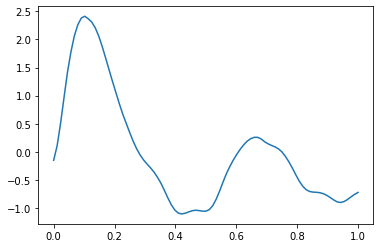

In [103]:
plt.plot(acc_separated[0][:,3],acc_separated[0][:,2]) 

In [95]:
acc_separated[0][:,:3] = (acc_separated[0][:,:3] - np.mean(acc_separated[0][:,:3],axis=0))/np.std(acc_separated[0][:,:3],axis=0)

In [61]:
scale

384979.0

In [78]:
gyro_separated[0][:,:3] = (gyro_separated[0][:,:3] - np.mean(gyro_separated[0][:,:3],axis=0))/np.std(gyro_separated[0][:,:3],axis=0)

In [76]:
np.mean(gyro_separated[0][:,:3],axis=0)

array([0.61886951, 0.96558591, 0.34922095])

In [81]:
np.std(gyro_separated[0][:,:3],axis=0)

array([1., 1., 1.])

In [85]:
acc_separated[0][0]

array([0.33471571, 0.16950016, 0.29421492, 0.        ])